# 서울시 생활정보 기반 대중교통 수요 분석 프로젝트

---

## Step 2. 데이터 분석 - 구별 유동인구 데이터

[기본 데이터]
* seoul_moving_month_202401.csv

[데이터 소개]
* 서울 시 구별 이동 2024년 1월 데이터
* https://data.seoul.go.kr/dataVisual/seoul/seoulLivingMigration.do

[변수 소개]
* 도착시간 : 0 -> "0:00~0:59"를 의미 
* 출발 자치구 : 자치구 코드
* 성별 : F(여성), M(남성)
* 나이 : 10 ~ 79세 (5세 단위), 0 ~ 10세, 80세 이상으로 구분
* 유형 : H(야간상주지), W(주간상주지), E(기타)
* 평균 이동 시간 : 동일 열 내 이동인구의 월 단위 평균 이동 시간 (10분단위)
* 이동인구 : 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만의 경우 * 처리

---

## Step 2.1.데이터 불러오기

####  데이터 프레임을 불러오고 변수로 저장(여기서는 CSV 기준으로 진행)
* csv : pd.read_csv("파일이름. csv")
* txt : pd.read_csv("파일이름. csv", sep="구분자")
* xlsx : pd.read_excel('파일이름.xlsx')
* pickle : pd.read_pickle("파일이름.pkl") <br>
 [참고] pickle은 파이썬의 모든 객체를 파일로 저장할 수 있는 방법으로 DataFrame,List,Dict 등 모든 객체 저장 가능(특히 sklearn라이브러리를 통해 모델을 학습시키고, 저장할 때 많이 사용)

#### 데이터 로딩
* Pandas 라이브러리를 활용해서 'seoul_moving_month_202401.csv' 데이터를 확인하세요.
    * 아래에 'Pandas'를 Import하고 'seoul_moving_month_202401.csv'파일을 'seoul_moving'에 불러오고,  Shape을 확인하는 소스코드를 작성하고 실행해보세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 ',' 입니다
        * UTF-8 인코더를 사용해 주세요

In [1]:
import pandas as pd

seoul_moving = pd.read_csv('./1.2 seoul_moving_month_202401.csv',sep=",", encoding = 'UTF-8')

In [2]:
# 데이터 프레임의 Shape 확인
seoul_moving.shape

(29361031, 10)

---

## Step 2.2.기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### 기본 정보 확인
* 'seoul_moving' 데이터의 정보를 확인해보세요.
* 'describe', 'info', 'head' 등 전부 활용해 보겠습니다.

In [3]:
# describe()
seoul_moving.describe()

,대상연월,도착시간,출발 시군구 코드,도착 시군구 코드,나이,평균 이동 시간(분)
count,29361031.0,2.936103e+07,2.936103e+07,2.936103e+07,2.936103e+07,2.936103e+07
mean,202401.0,1.362194e+01,1.710538e+04,1.718123e+04,4.285979e+01,9.366626e+01
std,0.0,5.835017e+00,9.024981e+03,9.037102e+03,1.799456e+01,7.803316e+01
min,202401.0,0.000000e+00,1.101000e+04,1.101000e+04,0.000000e+00,1.000000e+00
25%,202401.0,1.000000e+01,1.110000e+04,1.111000e+04,3.000000e+01,4.900000e+01
50%,202401.0,1.400000e+01,1.120000e+04,1.120000e+04,4.000000e+01,7.400000e+01
75%,202401.0,1.800000e+01,3.101400e+04,3.101400e+04,5.500000e+01,1.120000e+02
max,202401.0,2.300000e+01,3.900000e+04,3.900000e+04,8.000000e+01,4.462000e+03


In [4]:
# info()
seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29361031 entries, 0 to 29361030
Data columns (total 10 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   대상연월         int64 
 1   요일           object
 2   도착시간         int64 
 3   출발 시군구 코드    int64 
 4   도착 시군구 코드    int64 
 5   성별           object
 6   나이           int64 
 7   이동유형         object
 8   평균 이동 시간(분)  int64 
 9   이동인구(합)      object
dtypes: int64(6), object(4)
memory usage: 2.2+ GB


In [5]:
# head()
seoul_moving.head()

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202401,일,0,11010,11010,F,0,EE,20,28.06
1,202401,일,0,11010,11010,F,10,EE,167,11.96
2,202401,일,0,11010,11010,F,10,EH,203,17.63
3,202401,일,0,11010,11010,F,10,HE,23,5.96
4,202401,일,0,11010,11010,F,10,WH,27,5.90


* 1번 열의 의미
    * " 2024년 1월 일요일에 11010(종로구)에서 11010(종로구)으로 이동하여 0시 ~ 0시 59분 사이에 도착했고, E(기타)에서 E(기타)로 이동한 10 ~ 15세 여성은 총 11.96명이며 이들의 평균 이동시간은 167분이다


#### 결측치 처리 ( NaN이 아닌 결측치를 처리 해봅시다)

* '이동인구(합)' column은 이동 인구의 합산인데 object 타입
    - Why?
    - Tip! (이동인구 : 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만의 경우 * 처리)
    - 3명 미만의 이동인구는 * 처리 되어 있어서 해당 값을 나름의 기준으로 변경하세요.(중위값)
    - '이동인구(합)' 컬럼의 데이터 타입을 수치형으로 변경하세요 

In [6]:
# value_counts()
seoul_moving['이동인구(합)'].value_counts()

이동인구(합)
*          3870174
6.05        420734
3.30        397265
3.29        286071
3.31        234821
            ...   
1617.95          1
2414.11          1
1499.98          1
1478.45          1
689.93           1
Name: count, Length: 140404, dtype: int64

In [7]:
# '*' 값의 최빈값과 평균값을 알 수 없는 상황이라 중위값으로 대체 (1.5명)
replacement_value = 1.5
seoul_moving['이동인구(합)'].replace('*', replacement_value, inplace=True)

/var/folders/b4/30fgt7y52l55b_6smxmlmffw0000gn/T/ipykernel_21332/3965662507.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  seoul_moving['이동인구(합)'].replace('*', replacement_value, inplace=True)


In [8]:
# 이동인구(합) column의 데이터 타입 변경
# astype()
seoul_moving['이동인구(합)'] = seoul_moving['이동인구(합)'].astype(float)

#### 이동유형, 요일, 성별 변수의 value수를 파악

In [9]:
# 이동유형, value_counts()
seoul_moving['이동유형'].value_counts()

이동유형
EH    5947038
HE    5585412
EE    5224553
WH    3078348
WE    2759477
HW    2700535
EW    2330931
WW    1082641
HH     652096
Name: count, dtype: int64

In [10]:
# 요일, value_counts()
seoul_moving['요일'].value_counts()

요일
월    4448237
수    4341429
화    4300070
토    4254525
금    4251430
목    4005959
일    3759381
Name: count, dtype: int64

* 24년 1월의 요일 수를 알려드릴게요
    * 일 : 4, 월 : 5, 화 : 5, 수 : 5, 목 : 4, 금 : 4, 토 : 4

In [11]:
# 성별, value_counts()
seoul_moving['성별'].value_counts()

성별
M    16433525
F    12927506
Name: count, dtype: int64

#### 어느 요일의 심야 이동이 가장 많을까요?

In [12]:
# 새벽 5시까지 도착하는 이동 사례, seoul_moving_night 변수 저장

seoul_moving_night = seoul_moving[seoul_moving['도착시간'] <= 5]

seoul_moving_night.head(3)

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202401,일,0,11010,11010,F,0,EE,20,28.06
1,202401,일,0,11010,11010,F,10,EE,167,11.96
2,202401,일,0,11010,11010,F,10,EH,203,17.63


#### 서울 지역의 데이터만 골라 보도록 하겠습니다.

* 우리는 서울시의 데이터만 필요합니다.
* 시군구 코드:광역시도(2자리)+시군구(3자리) / 서울:11, 부산:26, 대구:27, 인천:28, 광주:29, 대전:30, 울산:31

* 출발과 도착이 모두 서울인 데이터만 추출!

In [13]:
# 출발 시군구 코드, 도착 시군구 코드 <20000
seoul_data = seoul_moving[(seoul_moving['출발 시군구 코드'] < 20000) & (seoul_moving['도착 시군구 코드'] < 20000)]

In [14]:
seoul_data.head(3)

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202401,일,0,11010,11010,F,0,EE,20,28.06
1,202401,일,0,11010,11010,F,10,EE,167,11.96
2,202401,일,0,11010,11010,F,10,EH,203,17.63


#### 서울지역의 구 별로 groupby하여 데이터 확인 (유동인구 기준)

* 유출이 제일 많은 구는?

* 유입이 제일 많은 구는?

* 유출이 제일 적은 구는?

* 유입이 제일 적은 구는?

* 참고자료 서울 구별 코드
    * 11010	종로구
    * 11020	중구
    * 11030	용산구
    * 11040	성동구
    * 11050	광진구
    * 11060	동대문구
    * 11070	중랑구
    * 11080	성북구
    * 11090	강북구
    * 11100	도봉구
    * 11110	노원구
    * 11120	은평구
    * 11130	서대문구
    * 11140	마포구
    * 11150	양천구
    * 11160	강서구
    * 11170	구로구
    * 11180	금천구
    * 11190	영등포구
    * 11200	동작구
    * 11210	관악구
    * 11220	서초구
    * 11230	강남구
    * 11240	송파구
    * 11250	강동구

In [15]:
gu_code = {
    "11010":"종로구",
    "11020":"중구",
    "11030":"용산구",
    "11040":"성동구",
    "11050":"광진구",
    "11060":"동대문구",
    "11070":"중랑구",
    "11080":"강북구",
    "11090":"도봉구",
    "11110":"노원구",
    "11120":"은평구",
    "11130":"종로구",
    "11010":"서대문구",
    "11140":"양천구",
    "11160":"강서구",
    "11170":"구로구",
    "11180":"금천구",
    "11190":"영등포구",
    "11200":"동작구",
    "11210":"관악구",
    "11220":"서초구",
    "11230":"강남구",
    "11240":"송파구",
    "11250":"강동구",
    "11010":"종로구"
}

In [16]:
# 유출이 제일 많은 구와 적은 구는?
outflow_grouped = seoul_data.groupby('출발 시군구 코드')['이동인구(합)'].sum()
print(f"유출이 제입 많은 구 : {gu_code[str(outflow_grouped.idxmax())]}")
print(f"유출이 제입 적은 구 : {gu_code[str(outflow_grouped.idxmin())]}")

유출이 제입 많은 구 : 강남구
유출이 제입 적은 구 : 금천구


In [17]:
# 유입이 제일 많은 구와 적은 구는?
inflow_grouped = seoul_data.groupby('도착 시군구 코드')['이동인구(합)'].sum()
print(f"유입이 제입 많은 구 : {gu_code[str(inflow_grouped.idxmax())]}")
print(f"유입이 제입 적은 구 : {gu_code[str(inflow_grouped.idxmin())]}")

유입이 제입 많은 구 : 강남구
유입이 제입 적은 구 : 금천구


#### 낮시간만! 심야버스 제외

* 도착시간 0부터 4까지(0:00 ~ 4:59) 제거

In [18]:
# '도착시간' >=5
# 새벽 5시까지 도착하는 이동 사례, seoul_moving_night 변수 저장

seoul_moving_day = seoul_moving[seoul_moving['도착시간'] >= 5]

seoul_moving_day.head(3)

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
2377741,202401,일,5,11010,11010,F,0,HE,54,28.28
2377742,202401,일,5,11010,11010,F,0,HW,30,28.03
2377743,202401,일,5,11010,11010,F,10,EE,54,6.00


#### '도착 시군구 코드' 를 기준으로 각 구별로 '평균 이동 시간(분)' , '이동인구(합)' 의 평균 과 합 계산

* groupby 사용, as_index=False로 설정

In [19]:
# 평균을 구해서 df_mean 변수로 저장
df_mean = seoul_moving.groupby(['도착 시군구 코드'],as_index=False)[['평균 이동 시간(분)','이동인구(합)']].mean()
df_mean.head(3)

,도착 시군구 코드,평균 이동 시간(분),이동인구(합)
0,11010,88.403146,28.184992
1,11020,85.488992,29.646272
2,11030,82.991840,22.645748


In [20]:
# 합을 구해서 df_sum 변수로 저장
# 평균이동시간(분) -> 총 이동 시간, 이동인구(합) -> 총 이동인구로 이름 대체
df_sum = seoul_moving.groupby(['도착 시군구 코드'],as_index=False)[['평균 이동 시간(분)','이동인구(합)']].sum()
df_sum.rename(columns={'평균 이동 시간(분)':'총 이동 시간','이동인구(합)':'총 이동인구'},inplace=True)
df_sum.head(3)

,도착 시군구 코드,총 이동 시간,총 이동인구
0,11010,75660805,24122435.37
1,11020,74786540,25934825.41
2,11030,67096081,18308317.25


In [21]:
# pd.merge()

# df_mean
# df_sum

df_merge = pd.merge(df_mean, df_sum, how='inner', on='도착 시군구 코드')
df_merge.head(3)

,도착 시군구 코드,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,11010,88.403146,28.184992,75660805,24122435.37
1,11020,85.488992,29.646272,74786540,25934825.41
2,11030,82.991840,22.645748,67096081,18308317.25


In [22]:
# to_csv()
df_merge.to_csv('./seoul_moving.csv',index=False)

---

## Step 2.3.데이터 시각화
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

In [23]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

# For Mac OS
plt.rc('font', family='AppleGothic')
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# # For Windows
# plt.rc('font', family='Malgun Gothic')
# sns.set(font="Malgun Gothic", 
#         rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
#         style='darkgrid')

#### 데이터 분포

* 가설 1. 요일이 유동인구에 영향을 미치는가?
* 가설 2. 시간대별 유동에 따른 차이가 발생하는가?
* 가설 3. 성별에 따른 유동인구에 차이가 발생하는가?
* 가설 4. 나이에 따른 활동량으로 유동인구에 차이가 발생하는가?
* 가설 5. 이동유형에 따라 평균 이동시간에 차이가 발생하는가?
* 가설 6. 출근시간(06:00 ~ 10:00) 퇴근시간(05:00 ~ 09:00)를 구분지어야 하는가?

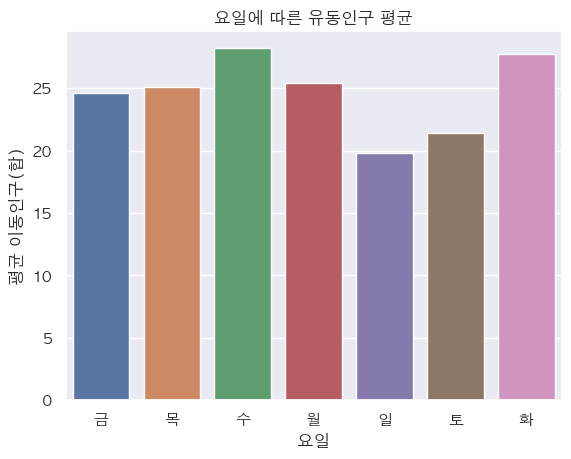

In [24]:
# 가설 : 요일이 유동인구에 영향을 미치는가?
# 요일별 유동인구 평균 계산
day_mean = seoul_moving.groupby('요일')['이동인구(합)'].mean()

# 요일별 유동인구 시각화
sns.barplot(x=day_mean.index, y=day_mean.values)
plt.title('요일에 따른 유동인구 평균')
plt.xlabel('요일')
plt.ylabel('평균 이동인구(합)')
plt.show()

/Users/dkmoon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/dkmoon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


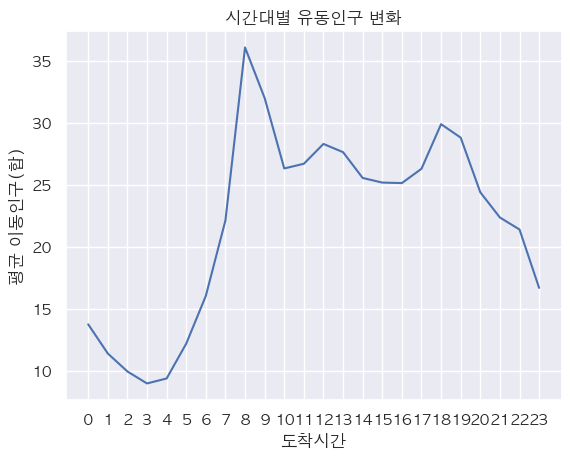

In [25]:
# 가설 : 시간대별 유동에 따른 차이가 발생하는가?
# 시간대별 유동인구 평균 계산
time_mean = seoul_moving.groupby('도착시간')['이동인구(합)'].mean()

# 시간대별 유동인구 시각화
sns.lineplot(x=time_mean.index, y=time_mean.values)
plt.title('시간대별 유동인구 변화')
plt.xlabel('도착시간')
plt.ylabel('평균 이동인구(합)')
plt.xticks(range(0, 24))  # 0시부터 23시까지
plt.show()

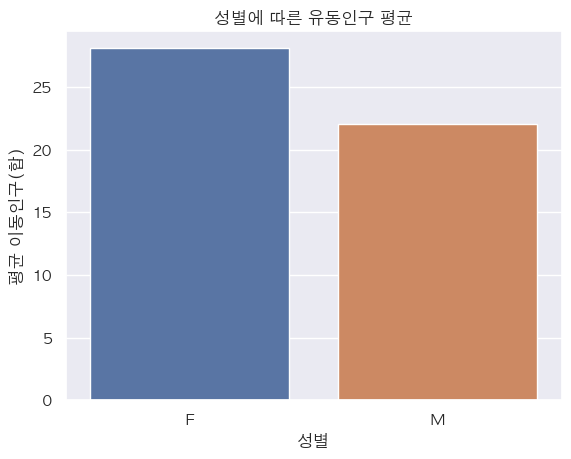

In [26]:
# 가설 : 성별에 따른 유동인구에 차이가 발생하는가?
# 성별별 유동인구 평균 계산
gender_mean = seoul_moving.groupby('성별')['이동인구(합)'].mean()

# 성별별 유동인구 시각화
sns.barplot(x=gender_mean.index, y=gender_mean.values)
plt.title('성별에 따른 유동인구 평균')
plt.xlabel('성별')
plt.ylabel('평균 이동인구(합)')
plt.show()

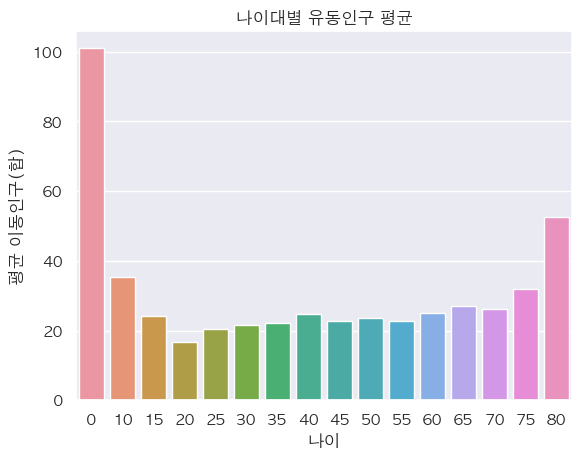

In [27]:
# 가설 : 나이에 따른 활동량으로 유동인구에 차이가 발생하는가?
# 나이대별 유동인구 평균 계산
age_mean = seoul_moving.groupby('나이')['이동인구(합)'].mean()

# 나이대별 유동인구 시각화
sns.barplot(x=age_mean.index, y=age_mean.values)
plt.title('나이대별 유동인구 평균')
plt.xlabel('나이')
plt.ylabel('평균 이동인구(합)')
plt.show()

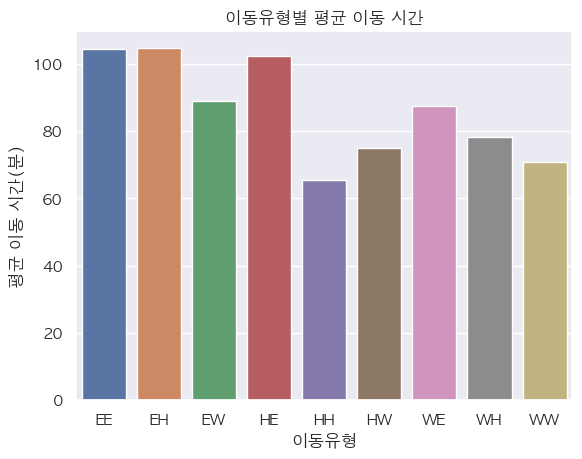

In [28]:
# 가설 : 이동유형에 따라 평균 이동시간에 차이가 발생하는가?
# 이동유형별 평균 이동 시간 계산
type_mean_time = seoul_moving.groupby('이동유형')['평균 이동 시간(분)'].mean()

# 이동유형별 평균 이동 시간 시각화
## 문자열 의미 : 출발지 + 도착지
sns.barplot(x=type_mean_time.index, y=type_mean_time.values)
plt.title('이동유형별 평균 이동 시간')
plt.xlabel('이동유형')
plt.ylabel('평균 이동 시간(분)')
plt.show()

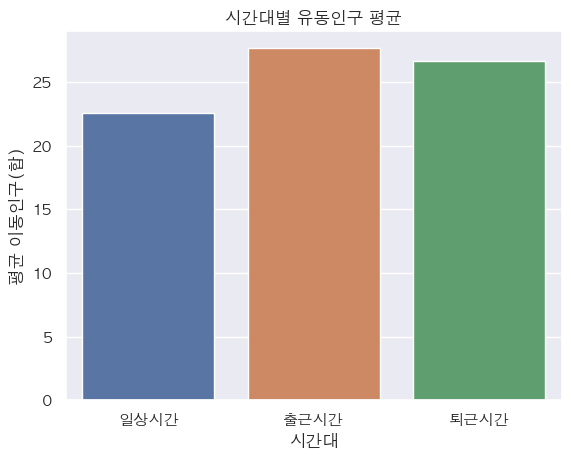

In [29]:
# 가설 : 출근시간과 퇴근 시간의 유동인구에 따른 차이가 발생하는가?
def categorize_time(hour):
    if 6 <= hour <= 10:
        return '출근시간'
    elif 17 <= hour <= 21:
        return '퇴근시간'
    else:
        return '일상시간'

# '시간대' 컬럼 추가
seoul_moving['시간대'] = seoul_moving['도착시간'].apply(categorize_time)

# 시간대별 유동인구 평균 계산
time_period_mean = seoul_moving.groupby('시간대')['이동인구(합)'].mean()

# 시간대별 유동인구 시각화
sns.barplot(x=time_period_mean.index, y=time_period_mean.values)
plt.title('시간대별 유동인구 평균')
plt.xlabel('시간대')
plt.ylabel('평균 이동인구(합)')
plt.show()

### My Insight

- 가설 1. 요일이 유동인구에 영향을 미치는가?
   - 전반적으로 휴일인 토요일과 일요일에 비해 평일에 유동인구가 많다.
- 가설 2. 시간대별 유동에 따른 차이가 발생하는가?
   - 시간에 따라 집중되어 유동이 발생하는 폭이 확연하게 확인가능하다.
- 가설 3. 성별에 따른 유동인구에 차이가 발생하는가?
   - 여성의 유동량이 남성보다 많이 발생한다.
- 가설 4.나이에 따른 활동량으로 유동인구에 차이가 발생하는가?
   - 시각적으로 확인하였을 때에는 특이하게 0~9세, 80세 이상의 인구의 유동량이 많이 나타난 것으로 보아 데이터에 대하여 정확하게 입력이 된 데이터인지, 아니면 비율로 전환해서 확인해보아야 한다.
- 가설 5.이동유형에 따라 평균 이동시간에 차이가 발생하는가?
   - E에 관련된 이동유형이 E가 미포함된 이동유형의 유동량보다 높은 편이다.
-  가설 6. 출근시간과 퇴근 시간의 유동인구에 따른 차이가 발생하는가?
   - 출근시간에서 인구의 유동이 가장 많고, 퇴근시간의 경우 야근 혹은 회식으로 인해 시간이 늦어지는 경우로 인하여 출근시간보다는 작게 나타나지만, 출퇴근 시간을 합쳐서 본다면 일상시간에 비해 확연히 많은 비중을 차지한다.

---